In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression-with-neural-networking/concrete_data.csv


### Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).


In [2]:
df = pd.read_csv('../input/regression-with-neural-networking/concrete_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.


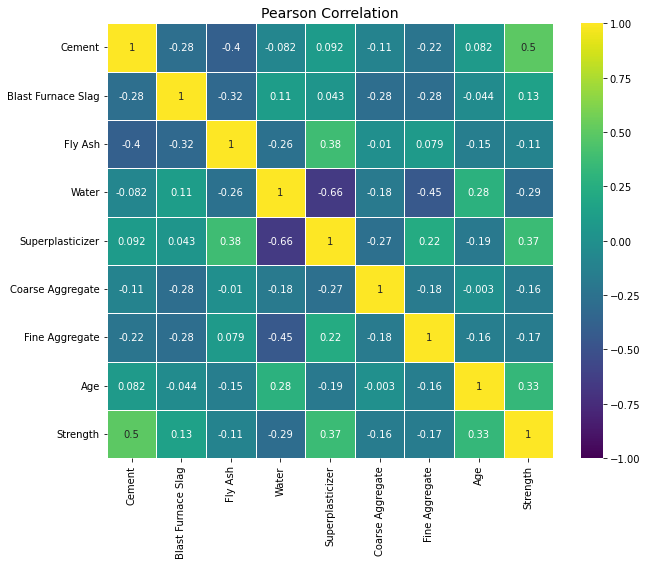

In [5]:
corr = plt.figure(figsize= (10, 8))
corr = sns.heatmap(df.corr(), vmax=1, vmin=-1,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white")
corr.set_title("Pearson Correlation",fontsize= 14)

plt.show()


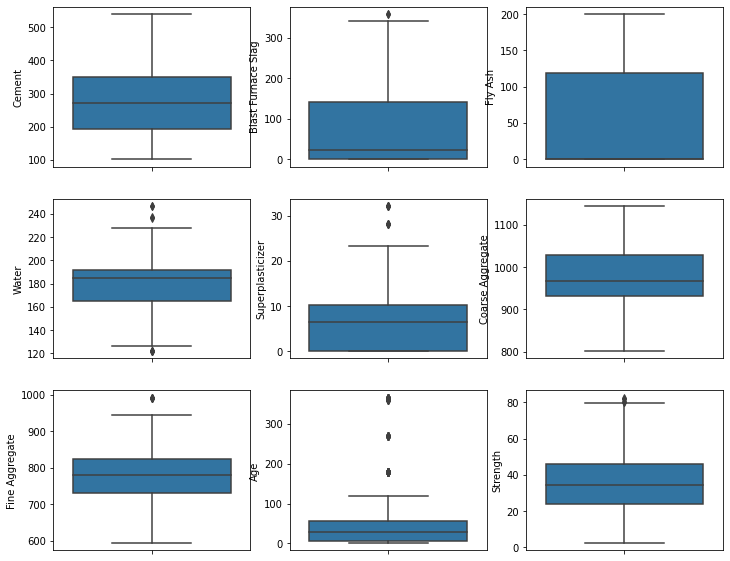

In [6]:
plt.figure(figsize=(12,10))
for i, num in enumerate(list(df.columns)):
    plt.subplot(3,3, i+1)
    sns.boxplot(y=df[num])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Strength', ylabel='Density'>

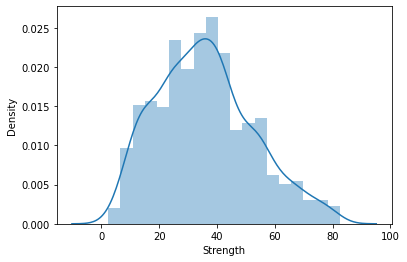

In [7]:
sns.distplot(df['Strength'])    


In [8]:
col = df.columns
col = list(col)[:-1]
col

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

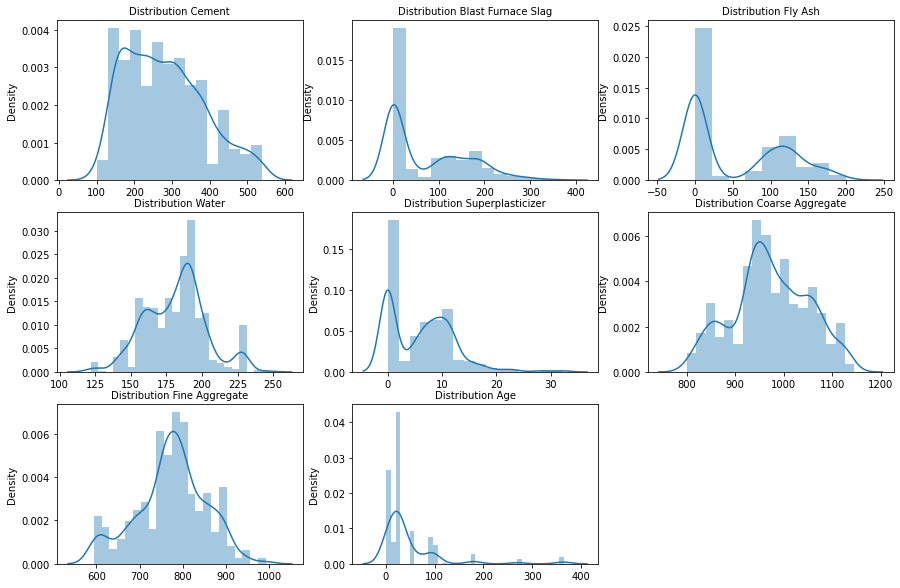

In [9]:
plt.figure(figsize=(15,10))
for i, num in enumerate(col):
    plt.subplot(3,3, i+1)
    sns.distplot(df[num])    
    plt.xlabel('')

    plt.title(f'Distribution {num}', fontsize=10)


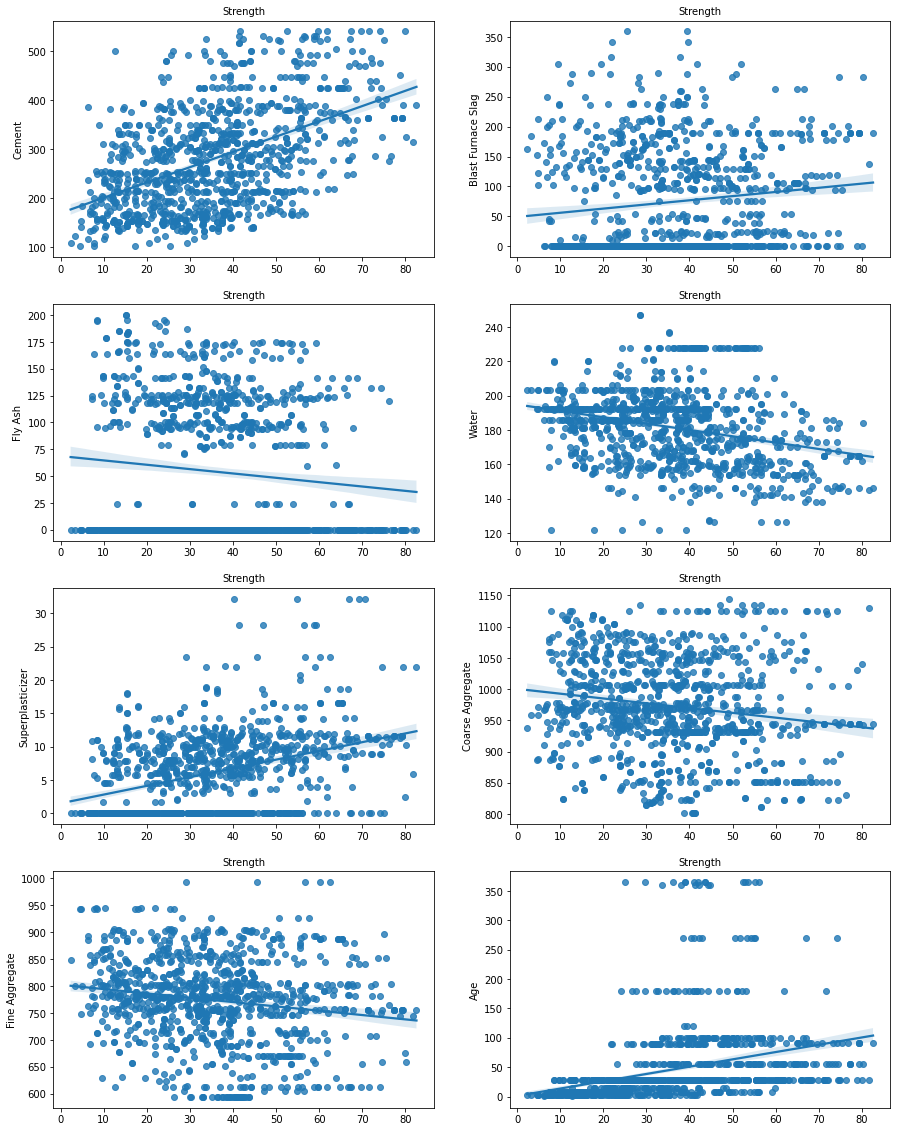

In [10]:

plt.figure(figsize=(15,20))
for i, num in enumerate(col):
    plt.subplot(4,2, i+1)
    sns.regplot(x="Strength",
            y=num, 
            data=df);
    plt.xlabel('')


    plt.title(f'Strength', fontsize=10)


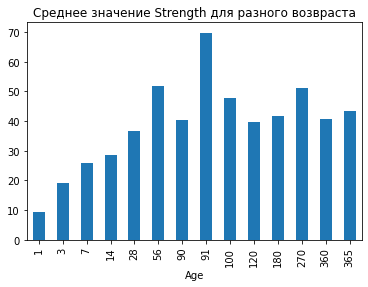

In [11]:
df.groupby('Age')['Strength'].mean().plot.bar()
plt.title('Среднее значение Strength для разного возвраста');


In [12]:
y = df['Strength']
x = df.drop(columns=['Strength'])


### (+1 балл) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE).

In [13]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFECV(estimator)
selector = selector.fit(x, y)
selector.support_
selector.ranking_


array([1, 1, 1, 1, 1, 3, 2, 1])

In [14]:
df = df.drop(columns=['Fine Aggregate']) # при удалении признака Age, качество ухудшается, поэтому удаляем только Fine Aggregate
y = df['Strength']
x = df.drop(columns=['Strength'])


### При обучении моделей использовать масштабирование данных.
### Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


parameters = {'alpha' : np.logspace(0, 10, 100)}
clf = GridSearchCV(Ridge(random_state=42), parameters, scoring='r2')
clf.fit(X_test, y_test)
clf.best_params_


{'alpha': 2.0092330025650473}

In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import numpy as np
clf = Ridge(alpha=2.0092330025650473)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_pred_train = clf.predict(X_train)


res = {}
res["ridge_test"] = mean_squared_error(y_test, clf_pred, squared=True), mean_squared_error(y_test, clf_pred, squared=False), r2_score(y_test, clf_pred)
res["ridge_train"] = mean_squared_error(y_train, clf_pred_train, squared=True), mean_squared_error(y_train, clf_pred_train, squared=False), r2_score(y_train, clf_pred_train)


print('r2',r2_score(y_test, clf_pred))
print('MSE',mean_squared_error(y_test, clf_pred, squared=True))
print('RMSE',mean_squared_error(y_test, clf_pred, squared=False))

r2 0.628924458031811
MSE 100.51374989072646
RMSE 10.025654586645524


In [18]:
clf.coef_

array([10.86044877,  7.53660224,  3.57480916, -4.2522927 ,  1.85833197,
        0.16891942,  6.8785537 ])

#### Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(Ridge(alpha=2.0092330025650473), x, y, cv=kf, return_train_score=True, scoring=('r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'))


arr_tr_mse = cv_results['train_neg_mean_squared_error']
arr_te_mse = cv_results['test_neg_mean_squared_error']
arr_tr_rmse = cv_results['train_neg_root_mean_squared_error']
arr_te_rmse = cv_results['test_neg_root_mean_squared_error']
arr_tr_r2 = cv_results['train_r2']
arr_te_r2 = cv_results['test_r2']


index = np.array(["train_mse", 'test_mse', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2'])
cv = pd.DataFrame(columns=['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'E', 'Std'])

arr_tr_mse = np.append(arr_tr_mse, np.mean(arr_tr_mse))
arr_tr_mse = np.append(arr_tr_mse, np.std(arr_tr_mse))
arr_te_mse = np.append(arr_te_mse, np.mean(arr_te_mse))
arr_te_mse = np.append(arr_te_mse, np.std(arr_te_mse))
arr_tr_rmse = np.append(arr_tr_rmse, np.mean(arr_tr_rmse))
arr_tr_rmse = np.append(arr_tr_rmse, np.std(arr_tr_rmse))
arr_te_rmse = np.append(arr_te_rmse, np.mean(arr_te_rmse))
arr_te_rmse = np.append(arr_te_rmse, np.std(arr_te_rmse))
arr_tr_r2 = np.append(arr_tr_r2, np.mean(arr_tr_r2))
arr_tr_r2 = np.append(arr_tr_r2, np.std(arr_tr_r2))
arr_te_r2 = np.append(arr_te_r2, np.mean(arr_te_r2))
arr_te_r2 = np.append(arr_te_r2, np.std(arr_te_r2))

cv = cv.append(pd.DataFrame([arr_tr_mse],index=['train_mse'],columns=cv.columns))
cv = cv.append(pd.DataFrame([arr_te_mse],index=['test_mse'],columns=cv.columns))
cv = cv.append(pd.DataFrame([arr_tr_rmse],index=['train_rmse'],columns=cv.columns))
cv = cv.append(pd.DataFrame([arr_te_rmse],index=['test_rmse'],columns=cv.columns))
cv = cv.append(pd.DataFrame([arr_tr_r2],index=['train_r2'],columns=cv.columns))
cv = cv.append(pd.DataFrame([arr_te_r2],index=['test_r2'],columns=cv.columns))


In [20]:
cv

,Fold1,Fold2,Fold3,Fold4,Fold5,E,Std
train_mse,-111.206566,-101.277858,-103.198920,-111.930216,-108.275827,-107.177877,3.887220
test_mse,-95.607112,-135.068666,-126.409852,-91.876250,-106.737759,-111.139928,15.478436
train_rmse,-10.545452,-10.063690,-10.158687,-10.579708,-10.405567,-10.350621,0.188249
test_rmse,-9.777889,-11.621905,-11.243214,-9.585210,-10.331397,-10.511923,0.729959
train_r2,0.608547,0.617521,0.628254,0.597388,0.626012,0.615544,0.010437
test_r2,0.628965,0.596417,0.553556,0.674166,0.547562,0.600133,0.043319


В тестовых данных наблюдается достаточно большой разброс MSE (STD).
Среднее значение сопостовимо со значением train/test

### Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + -регуляризатор. Использовать матрично-векторные операции для вычисления градиента.


In [21]:
class GD:
    def __init__(self, alpha=2.0092330025650473):
        self.w = None
        self.alpha = alpha
    

    def fit(self, X, y, lr=0.0001,max_iter=100):

        n, k = X.shape
        if self.w is None:
            self.w = np.random.randn(k + 1)
        
        X_train = np.hstack((X, np.ones((n, 1))))
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            grad = self._calc_gradient(X_train, y, y_pred)
            self.w -= lr * grad

        return self

    
    def predict(self, X):
        n, k = X.shape
        X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred
    
    
    def _calc_gradient(self, X, y, y_pred):

        lambdaI = self.alpha * np.eye(self.w.shape[0])
        lambdaI[-1, -1] = 0

        grad =2 *( (X.T @ X +lambdaI) @ self.w) -(2 * (X.T @ y ))


        return grad
    
    
    def get_weights(self):
        return self.w


#### Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и R2.


In [22]:
regressor = GD(alpha=2.0092330025650473)

regressor.fit(X_train, y_train, lr=0.0001, max_iter=10000)


clf_pred = regressor.predict(X_test)
clf_pred_train = regressor.predict(X_train)
w = regressor.get_weights()


print('r2',r2_score(y_test, clf_pred))
print('mse', mean_squared_error(y_test, clf_pred))
print('rmse', mean_squared_error(y_test, clf_pred, squared=False))


res["GD_test"] = mean_squared_error(y_test, clf_pred, squared=True), mean_squared_error(y_test, clf_pred, squared=False), r2_score(y_test, clf_pred)
res["GD_train"] = mean_squared_error(y_train, clf_pred_train, squared=True), mean_squared_error(y_train, clf_pred_train, squared=False), r2_score(y_train, clf_pred_train)
res

r2 0.6289244580318107
mse 100.5137498907265
rmse 10.025654586645528


{'ridge_test': (100.51374989072646, 10.025654586645524, 0.628924458031811),
 'ridge_train': (110.64961110494541, 10.51901188824052, 0.6068447129444611),
 'GD_test': (100.5137498907265, 10.025654586645528, 0.6289244580318107),
 'GD_train': (110.64961110494541, 10.51901188824052, 0.6068447129444611)}

###  (+2 балла) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.


In [23]:
import random
class SGD:
    def __init__(self, n_sample=1):
        self.w = None
        self.n_sample = n_sample

    def fit(self, X, y, lr=0.0001, max_iter=100000):

        n, k = X.shape

        if self.w is None:
            self.w = np.random.randn(k + 1)
        
        X_train = np.hstack((X, np.ones((n, 1))))
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            grad = self._calc_gradient(X_train, y, y_pred)

            self.w -= lr * grad

        return self
        
    def predict(self, X):
        n, k = X.shape
        X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred
    
    def get_weights(self):
        return self.w
    
    
    def _calc_gradient(self, X, y, y_pred):
        y = np.array(y)
        y_pred = np.array(y_pred)
        X= np.array(X)
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)
        
        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]

        grad = grad.mean(axis=0)
        return grad



In [24]:
regressor = SGD()

regressor.fit(X_train, y_train)


clf_pred = regressor.predict(X_test)
clf_pred_train = regressor.predict(X_train)
w = regressor.get_weights()

print('r2',r2_score(y_test, clf_pred))
print('mse', mean_squared_error(y_test, clf_pred))

res["SGD_test"] = mean_squared_error(y_test, clf_pred, squared=True), mean_squared_error(y_test, clf_pred, squared=False), r2_score(y_test, clf_pred)
res["SGD_train"] = mean_squared_error(y_train, clf_pred_train, squared=True), mean_squared_error(y_train, clf_pred_train, squared=False), r2_score(y_train, clf_pred_train)


r2 0.6279777889925449
mse 100.77017545447389


### (+2 балла) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.


In [25]:
regressor = SGD(n_sample=10)

regressor.fit(X_train, y_train)


clf_pred = regressor.predict(X_test)
clf_pred_train = regressor.predict(X_train)
w = regressor.get_weights()


res["miniSGD_test"] = mean_squared_error(y_test, clf_pred, squared=True), mean_squared_error(y_test, clf_pred, squared=False), r2_score(y_test, clf_pred)
res["miniSGD_train"] = mean_squared_error(y_train, clf_pred_train, squared=True), mean_squared_error(y_train, clf_pred_train, squared=False), r2_score(y_train, clf_pred_train)


print('r2',r2_score(y_test, clf_pred))
print('mse', mean_squared_error(y_test, clf_pred))

r2 0.6279155058550967
mse 100.78704617483089


In [26]:
res

{'ridge_test': (100.51374989072646, 10.025654586645524, 0.628924458031811),
 'ridge_train': (110.64961110494541, 10.51901188824052, 0.6068447129444611),
 'GD_test': (100.5137498907265, 10.025654586645528, 0.6289244580318107),
 'GD_train': (110.64961110494541, 10.51901188824052, 0.6068447129444611),
 'SGD_test': (100.77017545447389, 10.03843491060603, 0.6279777889925449),
 'SGD_train': (110.75464761431496, 10.524003402427946, 0.6064715018813572),
 'miniSGD_test': (100.78704617483089, 10.039275181746484, 0.6279155058550967),
 'miniSGD_train': (110.67312306389749, 10.520129422392934, 0.6067611712954779)}

In [27]:
result = pd.DataFrame.from_dict(res)
result = result.rename(index={0: 'mse', 1: 'rmse', 2: 'r2'})
result

,ridge_test,ridge_train,GD_test,GD_train,SGD_test,SGD_train,miniSGD_test,miniSGD_train
mse,100.513750,110.649611,100.513750,110.649611,100.770175,110.754648,100.787046,110.673123
rmse,10.025655,10.519012,10.025655,10.519012,10.038435,10.524003,10.039275,10.520129
r2,0.628924,0.606845,0.628924,0.606845,0.627978,0.606472,0.627916,0.606761


### Лучшие результаты показала модель mini batch